## Profit prediction using Multiple Linear Regression

* We will be predicting the profit from the startup’s dataset with the features available to us. 
* We’re using the 50-startups dataset for this problem statement and we will be using the concept of Multiple linear regression to predict the profit of startups companies

In [1]:
#Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [91]:
#Read CSV file
data=pd.read_csv("profit_analysis_dataset.csv")

In [92]:
data #All data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Basic Check

In [93]:
data.head()#Top 5 Row/columns

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [94]:
data.tail()#last 5 Row/columns 

,RD_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [95]:
data.shape

(50, 5)

In [96]:
data.describe()#Statistics Information

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
data.dtypes#Data Tyoes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [98]:
data.describe(include=["O"])

,State
count,50
unique,3
top,New York
freq,17


In [99]:
data.sum()#Total of all the columns

RD_Spend                                                  3686080.78
Administration                                            6067231.98
Marketing_Spend                                          10551254.89
State              New YorkCaliforniaFloridaNew YorkFloridaNew Yo...
Profit                                                    5600631.96
dtype: object

In [100]:
data.info()#no null value #Clean data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [101]:
len(data.columns)#5 columns

5

In [102]:
data.State.unique()#Unique is always with catgorical data

array(['New York', 'California', 'Florida'], dtype=object)

In [103]:
#checking null-values
data.isnull().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [104]:
data.duplicated().sum()

0

## Exploratory Data Analysis

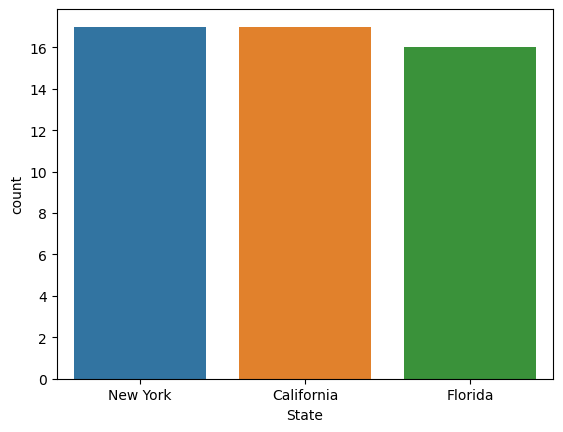

In [105]:
sns.countplot(x="State",data=data)#3 State
plt.show()

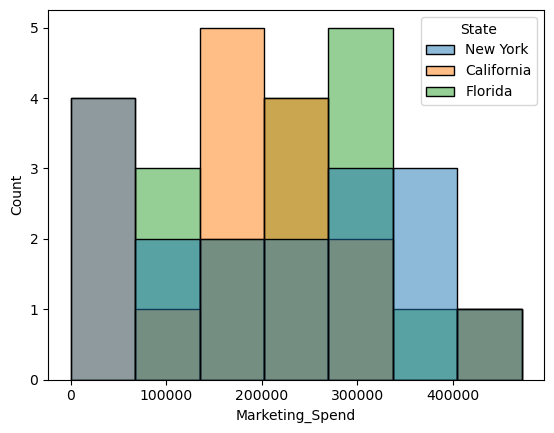

In [106]:
sns.histplot(x="Marketing_Spend",hue="State",data=data)# more money spending on California and florida compare to new york
plt.show()

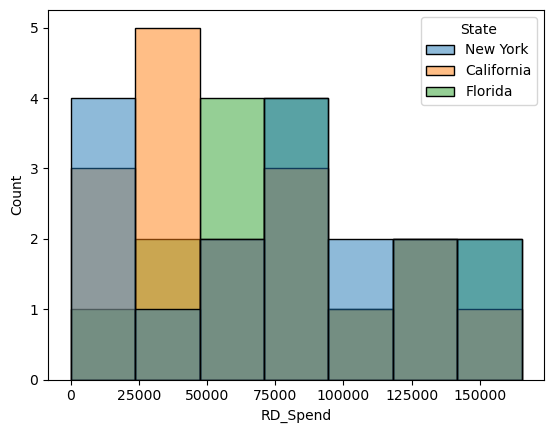

In [107]:
sns.histplot(x="RD_Spend",hue="State",data=data)#More money spending on Research&development in california
plt.show()

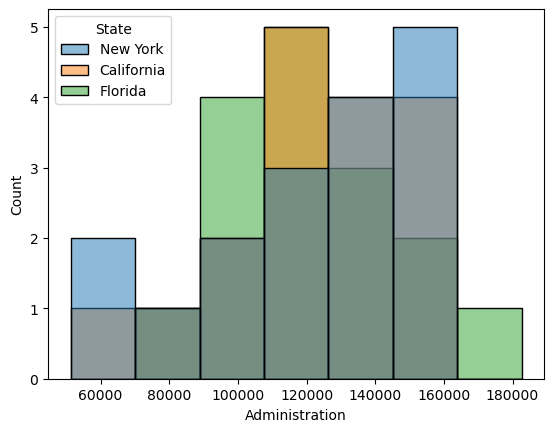

In [108]:
sns.histplot(x="Administration",hue="State",data=data)#No any relation 
plt.show()

In [109]:
data2=pd.DataFrame(data,columns=['RD_Spend', 'Administration', 'Marketing_Spend','Profit' ])# Create new DataFrame without state

In [110]:
data2

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [111]:
c=data2.corr()#Correlation
c

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


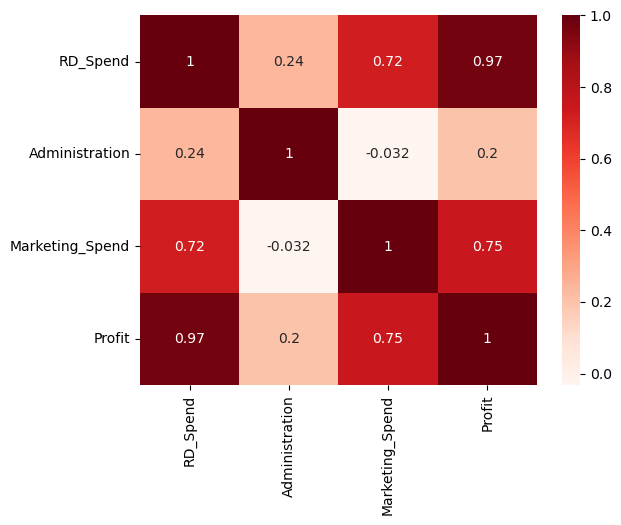

In [112]:
sns.heatmap(c,annot=True,cmap='Reds')# 100% Correlation
plt.show()

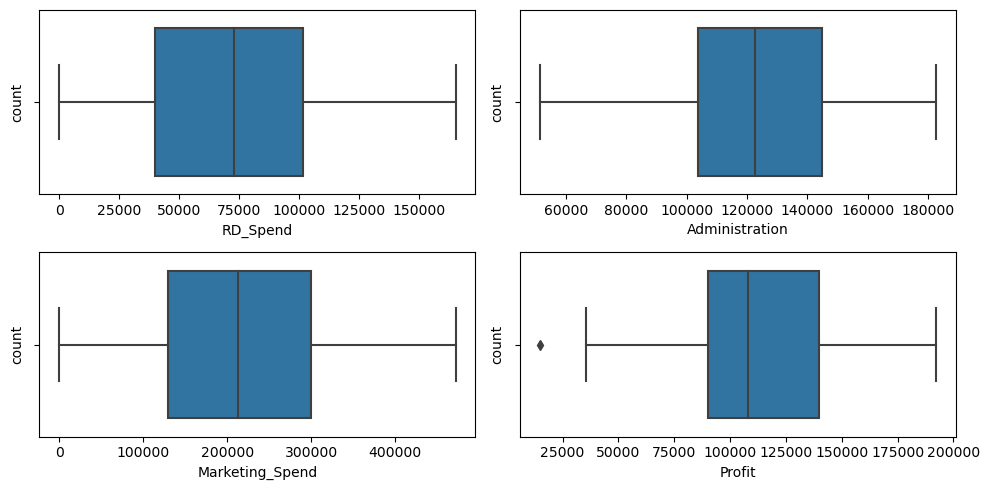

In [113]:
plt.figure(figsize=(10,5),facecolor="White")# Profit have a outlier but it is ok because we have very less data
plotnumber=1
for column in data2:
    if plotnumber<5:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=data2[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
        plotnumber+=1
    plt.tight_layout()

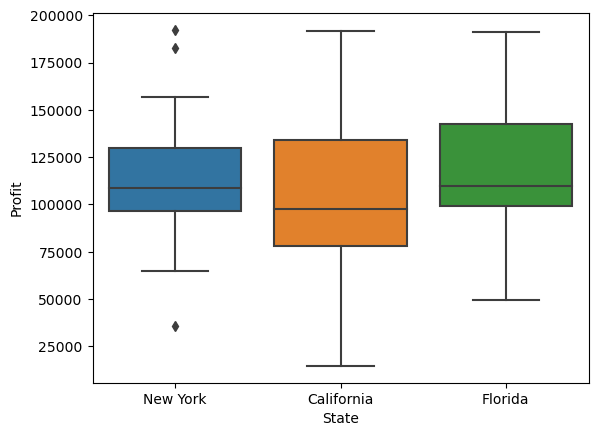

In [114]:
sns.boxplot(x = 'State', y = 'Profit', data = data)
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

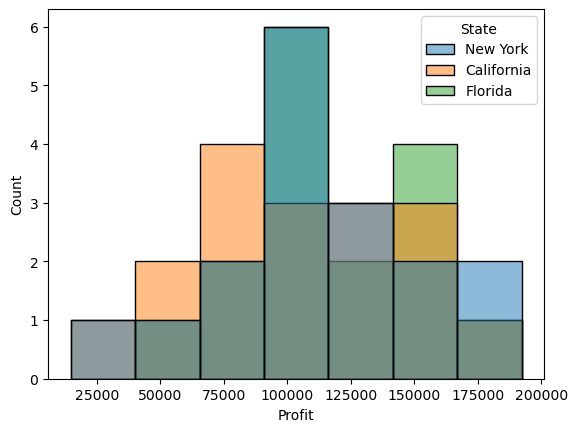

In [115]:
sns.histplot(x="Profit",hue="State",data=data)#Start-up generating profit from california

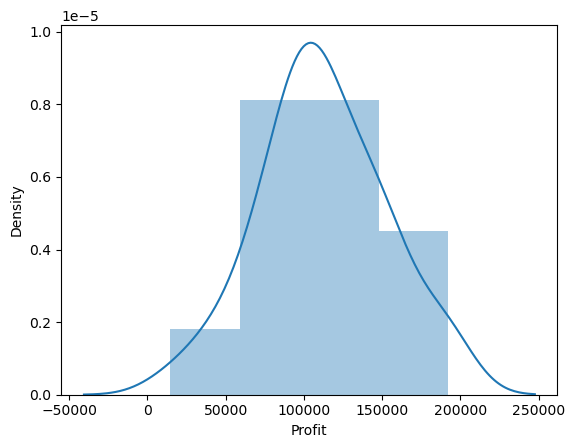

In [116]:
sns.distplot(data['Profit'],bins=4,kde=True)#Avearage profit 100k
plt.show()

In [117]:
sns.pairplot(data)#More corrlation between RD & Marketing and profit #No relation administration and profit
plt.show()re

SyntaxError: invalid syntax (3960265165.py, line 2)


1. As we can see in the pair pot, Research and development are directly proportional to the investment that we can do.
2. The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.
3. There is no relationship between the second column and profit i.e. our target column.

## Model Development

In [118]:
# spliting Dataset in Dependent & Independent Variables
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [119]:
X#Input variable

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [120]:
y#Output variable

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## Label Encoder

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [123]:
# Now we have to split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [187]:
# create a dataframe for the new data
# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# create a dataframe for the new data
new_df = pd.DataFrame({'RD_Spend': [21892.92, 23940.93], 
                       'Administration': [81910.77, 96489.63], 
                       'Marketing_Spend': [164270.7, 137001.1], 
                       'State': ['New York', 'California']})

# create a labelencoder object
labelencoder = LabelEncoder()

# use iloc to access the state column by its integer position
new_df.iloc[:, 3] = labelencoder.fit_transform(new_df.iloc[:, 3])

# print the dataframe
print(new_df)

   RD_Spend  Administration  Marketing_Spend State
0  21892.92        81910.77         164270.7     1
1  23940.93        96489.63         137001.1     0


In [162]:
y_pred = model.predict(new_df)
y_pred

array([67504.48656055, 68557.62842993])

In [126]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [127]:
test_score = model.score(x_test, y_test)
traning_score = model.score(x_train, y_train)

In [128]:
print("Testing_Score",test_score)
print("Traning_Score",traning_score)

Testing_Score 0.9355139722149947
Traning_Score 0.9515496105627431


In [129]:
data3= pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})#predicted value is close to the actual values
data3

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


## Model Evaluation

* R2 score: R2 score – R squared score. It is one of the statistical approaches by which we can find the variance or the spread of the target and feature data.

In [130]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 Score :",r2Score*100)

R2 Score : 93.39448007716634


* MSE: MSE – Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the residual

In [131]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred :" ,mse*100)

Mean Squarred : 6224496238.946447


* RMSE: RMSE – Root Mean Squared Error. This is similar to the Mean squared error(MSE) approach, the only difference is that here we find the root of the mean squared error i.e. root of the Mean squared error is equal to Root Mean Squared Error. The reason behind finding the root is to find the more close residual to the values found by mean squared error

In [132]:
Rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error : ",Rmse*100)

Root Mean Squarred Error :  788954.7666974608


* MAE: MAE – Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive

In [133]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error :" ,mae*100)

Mean Absolute Error : 650357.7323580025


In [166]:
Profit_prediction= pd.DataFrame({'RD_Spend': [21892.92, 23940.93], 
                       'Administration': [81910.77, 96489.63], 
                       'Marketing_Spend': [164270.7, 137001.1], 
                       'State': ['New York', 'California'],
                       'Profit': [67504.48656055, 68557.62842993]})

In [167]:
Profit_prediction

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,21892.92,81910.77,164270.7,New York,67504.486561
1,23940.93,96489.63,137001.1,California,68557.628430


## Conclusion

* So, the mean absolute error is 6503.577323580025. Therefore our predicted value can be 6503.577323580025 units more or less than the actual value.

    RD_Spend  Administration  Marketing_Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


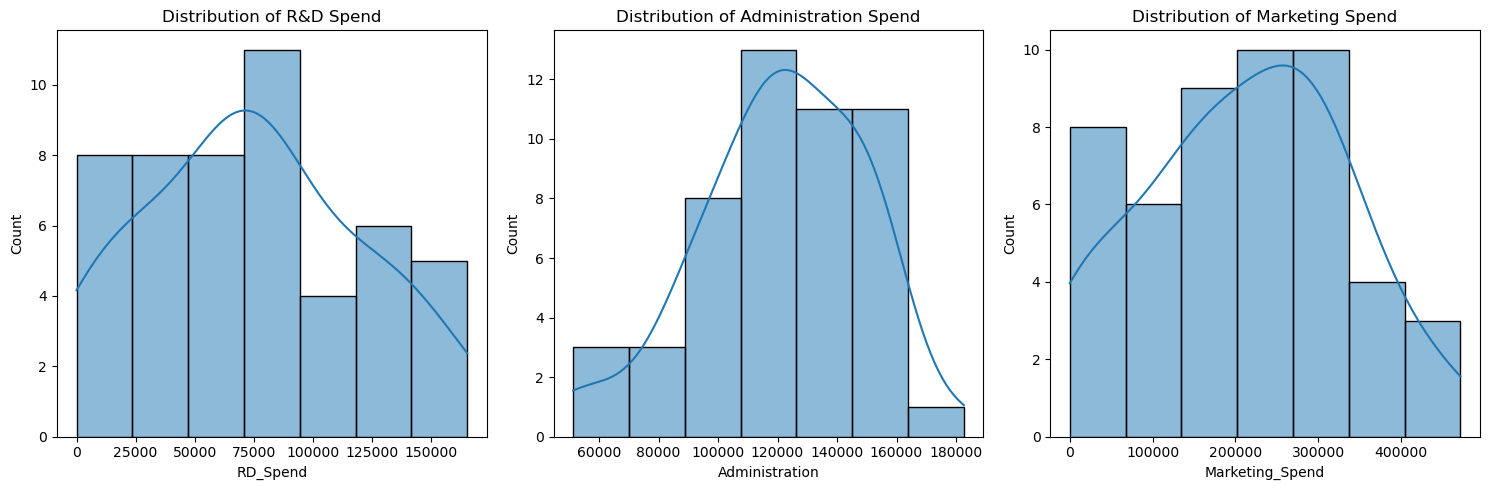

In [168]:
import pandas as pd
from tqdm.auto import tqdm

# Load the dataset
file_path = 'profit_analysis_dataset.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Show the head of the dataframe
df_head = df.head()
print(df_head)

# Plotting distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 5))

# Plot distribution of R&D Spend
plt.subplot(1, 3, 1)
sns.histplot(df['RD_Spend'], kde=True)
plt.title('Distribution of R&D Spend')

# Plot distribution of Administration Spend
plt.subplot(1, 3, 2)
sns.histplot(df['Administration'], kde=True)
plt.title('Distribution of Administration Spend')

# Plot distribution of Marketing Spend
plt.subplot(1, 3, 3)
sns.histplot(df['Marketing_Spend'], kde=True)
plt.title('Distribution of Marketing Spend')

plt.tight_layout()
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['State'])
    ], remainder='passthrough'
)

# Create a modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', LinearRegression())])

# Prepare the features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predictions for the provided data
new_data = pd.DataFrame({
    'RD_Spend': [21892.92, 23940.93],
    'Administration': [81910.77, 96489.63],
    'Marketing_Spend': [164270.7, 137001.1],
    'State': ['New York', 'California']  # Dummy states for prediction
})

# Make predictions
predictions = model.predict(new_data)

# Output the predictions
for i, pred in enumerate(predictions):
    print(f'Prediction for entry {i+1}: {pred:.2f}')

Prediction for entry 1: 68894.55
Prediction for entry 2: 69260.33


In [170]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(), ['State'])])

In [171]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['State'])])),
                ('model', LinearRegression())])

In [172]:
predictions

array([68894.5493244 , 69260.32799959])

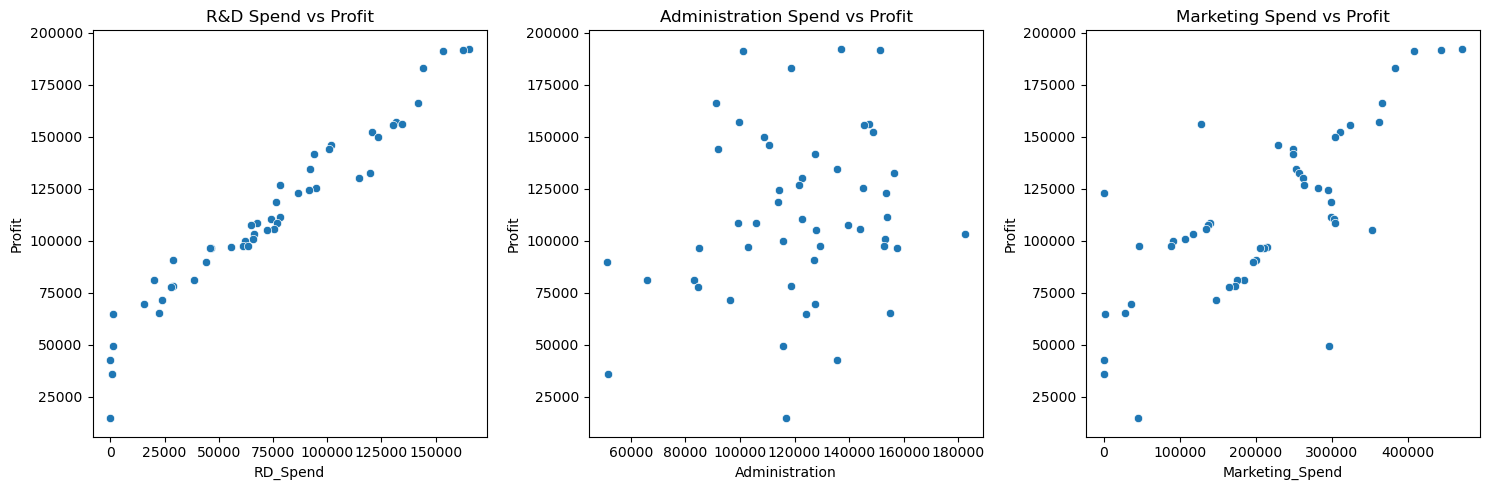

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 5))

# Plotting relationships
# Relationship between R&D Spend and Profit
plt.subplot(1, 3, 1)
sns.scatterplot(x='RD_Spend', y='Profit', data=df)
plt.title('R&D Spend vs Profit')

# Relationship between Administration Spend and Profit
plt.subplot(1, 3, 2)
sns.scatterplot(x='Administration', y='Profit', data=df)
plt.title('Administration Spend vs Profit')

# Relationship between Marketing Spend and Profit
plt.subplot(1, 3, 3)
sns.scatterplot(x='Marketing_Spend', y='Profit', data=df)
plt.title('Marketing Spend vs Profit')

plt.tight_layout()
plt.show()

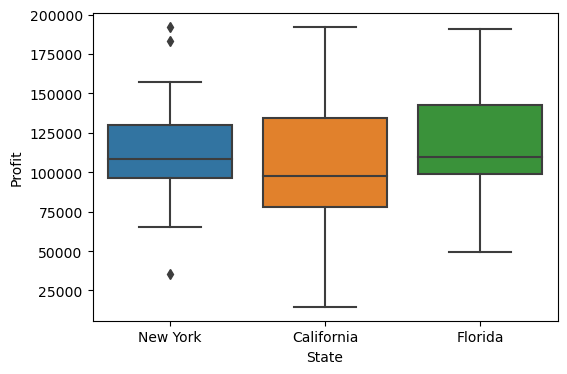

In [174]:
# plot the box plots of the profit variable by the state variable
plt.figure(figsize=(6, 4))
sns.boxplot(x='State', y='Profit', data=df)
plt.show()


Text(0, 0.5, 'Frequency')

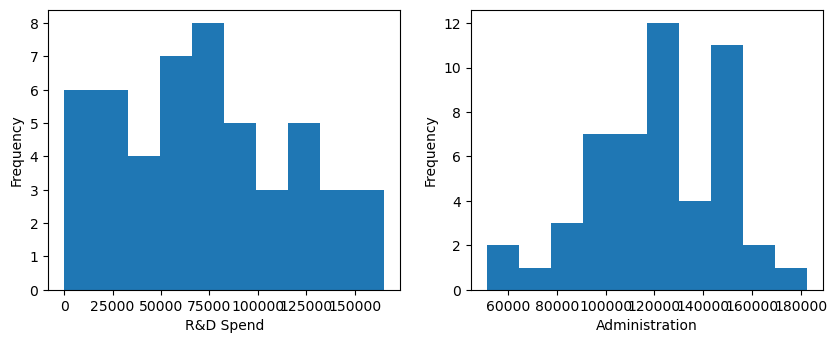

In [176]:
# plot the histograms of the numerical variables
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(df['RD_Spend'])
plt.xlabel('R&D Spend')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(df['Administration'])
plt.xlabel('Administration')
plt.ylabel('Frequency')
